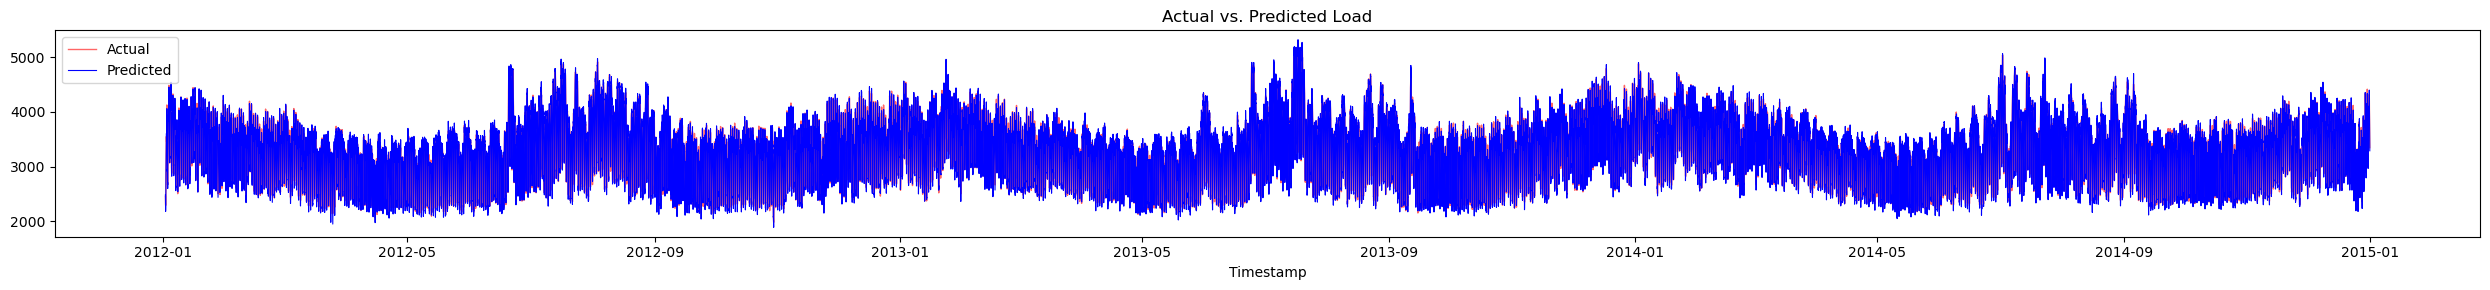

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load and sort energy data
energy = pd.read_csv("energy.csv", parse_dates=["timestamp"], index_col="timestamp")
energy = energy.sort_index()

# Define the target column and time steps
target_column = "load"
timesteps = 24

# Scale the full target series
scaler = MinMaxScaler()
scaled_load = scaler.fit_transform(energy[[target_column]])

# Generate synthetic predictions (you should replace these with real model predictions)
y_true = scaled_load[timesteps:]
y_pred = y_true + np.random.normal(0, 0.02, size=y_true.shape)

# Inverse scale both series
y_true_inv = scaler.inverse_transform(y_true)
y_pred_inv = scaler.inverse_transform(y_pred)

# Use timestamps from the aligned portion
timestamps = energy.index[timesteps:]

# Plot with wide aspect ratio and tight height
plt.figure(figsize=(25, 3))
plt.plot(timestamps, y_true_inv, color='red', linewidth=1.0, alpha=0.6)
plt.plot(timestamps, y_pred_inv, color='blue', linewidth=0.8)
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.xlabel('Timestamp')
plt.title('Actual vs. Predicted Load')
plt.grid(False)
plt.tight_layout()
plt.show()